In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
from sklearn import tree

In [3]:
data = pd.read_csv('C:/Users/Sm/Desktop/Exploration/2021/Feb/Towards AI/tutorials-master/decision_tree_learning/Iris.csv')
data


,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data.shape

"""**Define Colunms**"""

col_names = ['id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


In [6]:
data.columns = col_names

col_names

['id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [7]:
"""**Drop Id Column**"""

data = data.drop(['id'], axis=1)

data.head()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:

"""**Checking the  target categorical counts**"""

data['species'].value_counts()

"""**Check missing values in variables**"""

data.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:

target_col = ['species']

X = data.drop(['species'], axis=1)

y = data['species']

In [10]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [12]:
"""**Split dataset into train and test**"""

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [20]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)





DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(251.10000000000002, 380.52, 'X[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(167.4, 271.8, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(334.8, 271.8, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(167.4, 163.07999999999998, 'X[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(502.20000000000005, 163.07999999999998, 'X[2] <= 4.85\nentropy = 0.206\nsamples = 31\nvalue = [0, 1, 30]'),
 Text(418.5, 54.360000000000014, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(585.9, 54.360000000000014, 'entropy = 0.0\nsamples = 28\nvalue = [0, 0, 28]')]

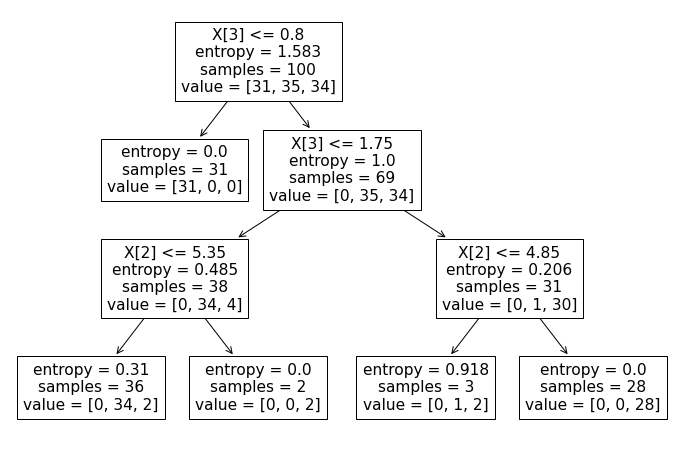

In [21]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train))

In [22]:
#Compare the train-set and test-set accuracy
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'I

In [16]:


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
print(confusion_matrix(y_pred_train_gini,y_train))



[[31  0  0]
 [ 0 34  2]
 [ 0  1 32]]


In [17]:
print(classification_report(y_pred_train_gini,y_train))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        31
Iris-versicolor       0.97      0.94      0.96        36
 Iris-virginica       0.94      0.97      0.96        33

       accuracy                           0.97       100
      macro avg       0.97      0.97      0.97       100
   weighted avg       0.97      0.97      0.97       100

